<a href="https://colab.research.google.com/github/chlolv/SRSE_project/blob/master/code/Project_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SRSE PROJECT
### Analysis of links between French middle schools and high school in Paris academy



Chloé Lavest, Emeline Maire

Ensae Paris - 2021-2022

## Pacakges and functions

In [1]:
import random
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
import os
import os.path
import csv

## Data download 

In [ ]:
#---------- DATA DOWNLOAD ---------#
wd = os.getcwd()
wd

'C:\\Users\\chloe\\OneDrive\\Bureau\\3A\\SRSE\\Projet\\Git\\code'

In [ ]:
os.chdir("..")
os.chdir("..")
temp_wd = os.getcwd()

In [ ]:
data_path = temp_wd + "\\data\\"
data_path

data_eleves = [data_path + f for f in os.listdir(data_path)]

FileNotFoundError: [WinError 3] Le chemin d’accès spécifié est introuvable: 'C:\\Users\\chloe\\OneDrive\\Bureau\\3A\\data\\'

In [17]:
data_eleves = pd.read_csv('eleve18.csv', sep = ";")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data_eleves

['C:\\Users\\chloe\\OneDrive\\Bureau\\3A\\SRSE\\Projet\\data\\eleve18.csv',
 'C:\\Users\\chloe\\OneDrive\\Bureau\\3A\\SRSE\\Projet\\data\\eleve19.csv',
 'C:\\Users\\chloe\\OneDrive\\Bureau\\3A\\SRSE\\Projet\\data\\eleve20.csv',
 'C:\\Users\\chloe\\OneDrive\\Bureau\\3A\\SRSE\\Projet\\data\\form.ADISP.2022-04-03.pdf']

In [ ]:
for i in data_eleves :
    locals()["_".join(['eleves',i[-6:-4]])] = pd.read_csv(i, sep = ";", dtype = "str") 


## Data preparation

In [ ]:
eleves_18['DRES'].unique()

array(['001', '069', '038', '039', '042', '073', '-', '071', '074', '014',
       '999', '058', '072', '007', '036', '030', '088', '084', '093',
       '006', '082', '003', '025', '013', '028', '045', '063', '017',
       '035', '091', '089', '068', '976', '021', '033', '079', '02B',
       '972', '026', '049', '043', '078', '057', '066', '034', '022',
       '973', '011', '067', '076', '005', '027', '018', '044', '085',
       '054', '988', '047', '002', '060', '080', '059', '077', '051',
       '092', '971', '081', '031', '008', '087', '048', '064', '062',
       '095', '052', '061', '083', '090', '053', '075', '974', '019',
       '056', '070', '037', '029', '094', '055', '010', '02A', '978',
       '050', '012', '015', '023', '041', '016', '086', '046', '024',
       '004', '975', '977', '040', '065', '032', '987', '986', '009'],
      dtype=object)

In [18]:
dep_idf = ['095', '078', '091', '092', '093', '094', '077', '075']

In [19]:
acV = ['095', '078', '091', '092']
acC = ['093', '094', '077']

In [20]:
idf_18 = data_eleves[data_eleves['DRES'].isin(dep_idf)]

In [24]:
idf_18['DRES'].unique()

array(['093', '091', '078', '077', '092', '095', '075', '094'],
      dtype=object)

In [29]:
conditions = [
              (idf_18[idf_18['DRES'].isin(acV)]),
              (idf_18[idf_18['DRES'].isin(acC)]),
              (idf_18['DRES'] == '075'),
]

values = ['Versailles', 'Créteil', 'Paris']


In [30]:
idf_18['Academie'] = np.select(conditions, values)

ValueError: ignored

In [ ]:
paris_18 = eleves_18.query("DRES == '075'")

In [ ]:
len(paris_18)

150218

In [ ]:
etabs = [i for i in paris_18['NUM_ETAB'].unique()]
len(etabs)

1528

In [ ]:
test = paris_18.query("PCS1 == '65'")
len(test)

301

In [ ]:
lower_classes = ['10', '21', '22', '52', '53', '54', '55', '56', '62', '63', '64', '65', '67', '68', '69', '81', '85', '86']
nationalities = []
grade_middleschool = []
grade_highschool = []

In [ ]:
for etab in etabs:
    cond = "NUM_ETAB == " + "'" + etab + "'"
    df_etab = paris_18.query(cond)
    df_etab['perc_french'] = len(df_etab.query("NATIO_G == '1'"))/len(df_etab)
    df_etab['perc_lwrclass'] = len(df_etab.query(PCS1 in lower_classes))/len(df_etab)
    df_etab['sex_ratio'] = len(df_etab.query("SEXE == '2'"))/len(df_etab)
 

In [31]:
liste_seconde = ['221114', '221121', '221131', '221141']
idf_2_18 = idf_18[idf_18['MEFST6'].isin(liste_seconde)]

In [ ]:
# columns that we need to compute the values that are interesting


#### Création du réseau

In [ ]:
eleves_G = nx.Graph()  # start by generating empty graph


eleves_G.add_nodes_from(idf_2_18['NUMETABP'], bipartite=0) # collèges
eleves_G.add_nodes_from(idf_2_18['NUM_ETAB'], bipartite=1) # lycées



In [37]:
eleves_G.add_edges_from([(Collèges, Lycées) for (Collèges, Lycées)
                          in idf_2_18[['NUMETABP','NUM_ETAB']].to_numpy()])

In [38]:
print(nx.info(eleves_G))

Graph with 2610 nodes and 14238 edges


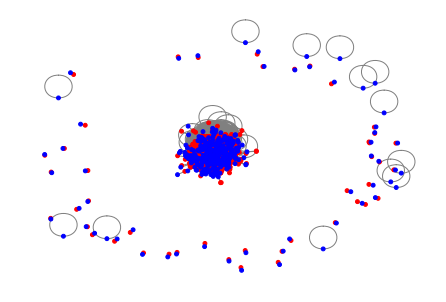

In [39]:
node_color = []

# then, for each node in the graph
for node in eleves_G.nodes(data=True):
    # if the node has the attribute bipartite = 0 (company), make it red
    if node[1]['bipartite']==0:
        node_color.append('red')
    # if the node has the attribute bipartite = 1 (director), make it blue
    elif node[1]['bipartite']==1:
        node_color.append('blue')

    # draw graph with node attribute color
nx.draw(eleves_G, with_labels=False, node_size = 15, node_color=node_color, edge_color = "gray")